# Import libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
import unittest
import seaborn as sns

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

# Import Data:


In [2]:
pd.set_option("display.precision", 2)
data = pd.read_csv("DengAI_data/dengue_features_train.csv", parse_dates=['week_start_date'])
data_test = pd.read_csv("DengAI_data/dengue_features_test.csv", parse_dates=['week_start_date'])
#data_submission = pd.read_csv("DengAI_data/submission_format.csv")
print(data.shape)
print(data_test.shape)
data.describe(include='all')
#data.head()


(1456, 24)
(416, 24)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  import sys


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456,1456.00,1456.00,1456,1262.00,1404.00,1434.00,1434.00,1443.00,1446.00,...,1446.00,1446.00,1443.00,1446.00,1446.00,1413.00,1413.00,1436.00,1442.00,1434.00
unique,2,NaN,NaN,1049,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,sj,NaN,NaN,2005-01-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,936,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1990-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2010-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.03,26.50,NaN,0.14,0.13,0.20,0.20,45.76,298.70,...,40.15,82.16,45.76,16.75,4.90,27.19,8.06,32.45,22.10,39.33
std,NaN,5.41,15.02,NaN,0.14,0.12,0.07,0.08,43.72,1.36,...,43.43,7.15,43.72,1.54,3.55,1.29,2.13,1.96,1.57,47.46
min,NaN,1990.00,1.00,NaN,-0.41,-0.46,-0.02,-0.06,0.00,294.64,...,0.00,57.79,0.00,11.72,1.36,21.40,4.53,26.70,14.70,0.00
25%,NaN,1997.00,13.75,NaN,0.04,0.05,0.16,0.14,9.80,297.66,...,13.05,77.18,9.80,15.56,2.33,26.30,6.51,31.10,21.10,8.70


In [3]:
labels =pd.read_csv("DengAI_data/dengue_labels_train.csv")
print(labels.shape)
labels["date"] = pd.to_datetime(labels.year.astype(str), format='%Y') + pd.to_timedelta(
labels.weekofyear.mul(7).astype(str) + ' days')
labels.head(3)

(1456, 4)


,city,year,weekofyear,total_cases,date
0,sj,1990,18,4,1990-05-07
1,sj,1990,19,5,1990-05-14
2,sj,1990,20,4,1990-05-21


Split dataset into cities

In [4]:
labels.index =labels["date"] 
labelsSJ=labels.query('city == "sj"')
labelsIQ=labels.query('city == "iq"') 
print(labelsIQ.shape)
print(labelsSJ.shape)

(520, 5)
(936, 5)


# Exploratory Data Analysis
Plot historical outbreak data to check the correlation between cities

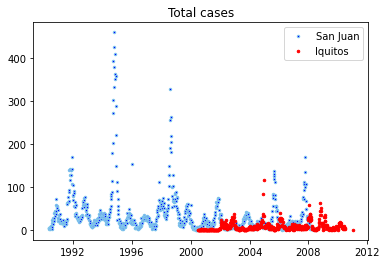

In [5]:
plt.plot( 'date', "total_cases", data=labelsSJ,  marker='.', markerfacecolor='blue', markersize=5,color='skyblue', linewidth=0, label='San Juan')
plt.plot( 'date', "total_cases", data=labelsIQ, marker='.', markerfacecolor='red', markersize=5, color='red', linewidth=0)
plt.title('Total cases')
plt.legend(['San Juan','Iquitos'],loc='upper right')

1) There is no or little correlation between cities, therefore separate models may be required for each city.

2) No apparent trends or seasonality



Text(0.5, 1.0, 'Iquitos')

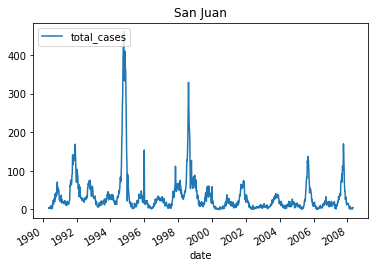

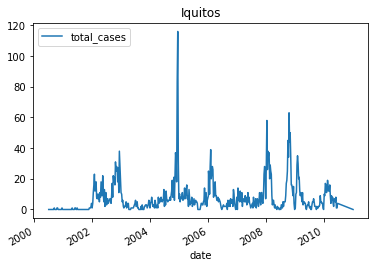

In [6]:
labelsSJ.plot(y=["total_cases"])
plt.legend(['total_cases'], loc='upper left')
plt.title('San Juan')
labelsIQ.plot(y=["total_cases"])
plt.legend(["total_cases"], loc='upper left')
plt.title('Iquitos')

The distribution of cases for each city:

Text(0.5, 1.0, 'San Juan')

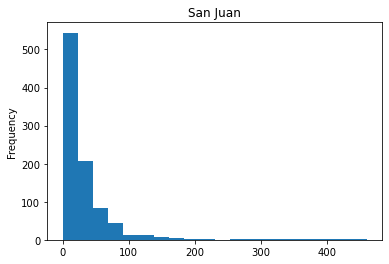

In [7]:
labelsSJ["total_cases"].plot.hist(bins=20, alpha=1)
plt.title('San Juan')

Text(0.5, 1.0, 'Iquitos')

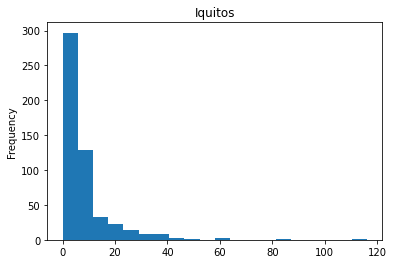

In [8]:
labelsIQ["total_cases"].plot.hist(bins=20, alpha=1)
plt.title('Iquitos')

It can be concluded that the average number of cases for a week is low, as only sometimes we have an outbreak when a total number of cases jumps to some higher value.

The next step is to check for strongly correlated values:

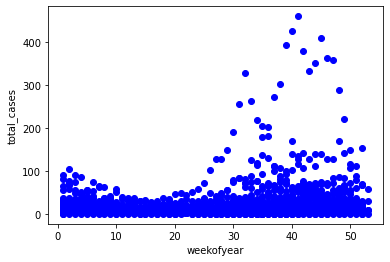

In [9]:
plt.scatter(data.weekofyear, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('weekofyear')
plt.show()


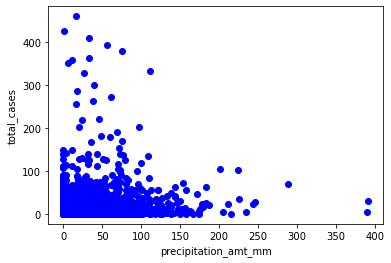

In [10]:
plt.scatter(data.precipitation_amt_mm, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('precipitation_amt_mm')
plt.show()

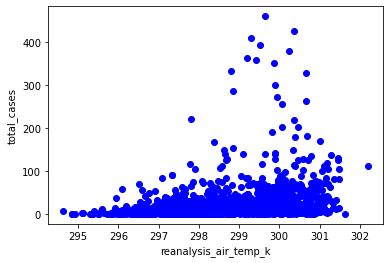

In [11]:
plt.scatter(data.reanalysis_air_temp_k, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('reanalysis_air_temp_k')
plt.show()

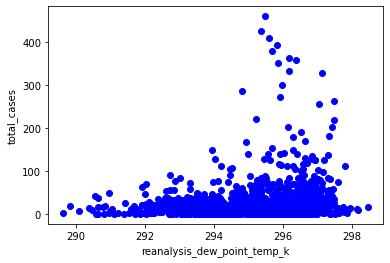

In [12]:
plt.scatter(data.reanalysis_dew_point_temp_k, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('reanalysis_dew_point_temp_k')
plt.show()

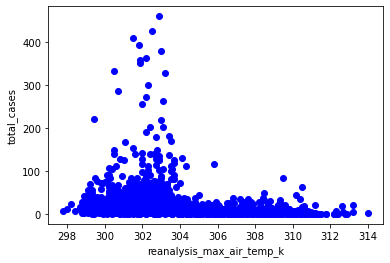

In [13]:
plt.scatter(data.reanalysis_max_air_temp_k, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('reanalysis_max_air_temp_k')
plt.show()

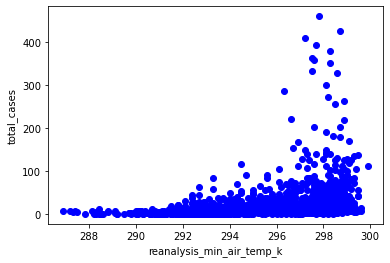

In [14]:
plt.scatter(data.reanalysis_min_air_temp_k, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('reanalysis_min_air_temp_k')
plt.show()

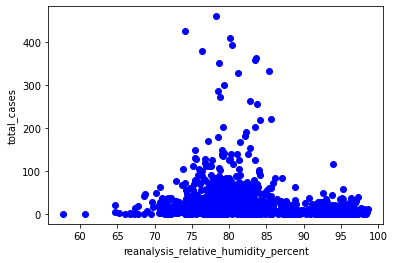

In [15]:
plt.scatter(data.reanalysis_relative_humidity_percent, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('reanalysis_relative_humidity_percent')
plt.show()

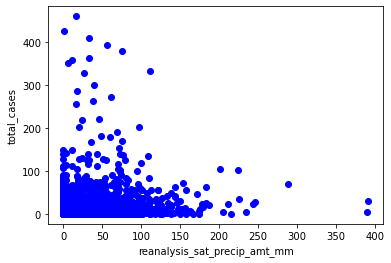

In [16]:
plt.scatter(data.reanalysis_sat_precip_amt_mm, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('reanalysis_sat_precip_amt_mm')
plt.show()

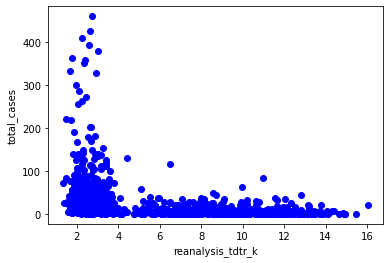

In [17]:
plt.scatter(data.reanalysis_tdtr_k, labels.total_cases,  color='blue')
plt.ylabel('total_cases')
plt.xlabel('reanalysis_tdtr_k')
plt.show()

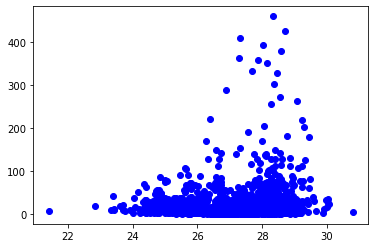

In [18]:
plt.scatter(data.station_avg_temp_c, labels.total_cases,  color='blue')
plt.show()

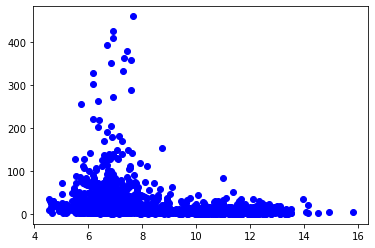

In [19]:
plt.scatter(data.station_diur_temp_rng_c, labels.total_cases,  color='blue')
plt.show()

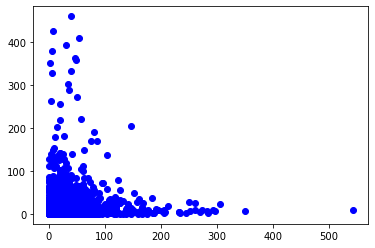

In [20]:
plt.scatter(data.station_precip_mm, labels.total_cases,  color='blue')
plt.show()

Plot correlation matrix to see if there is a correlation between variables

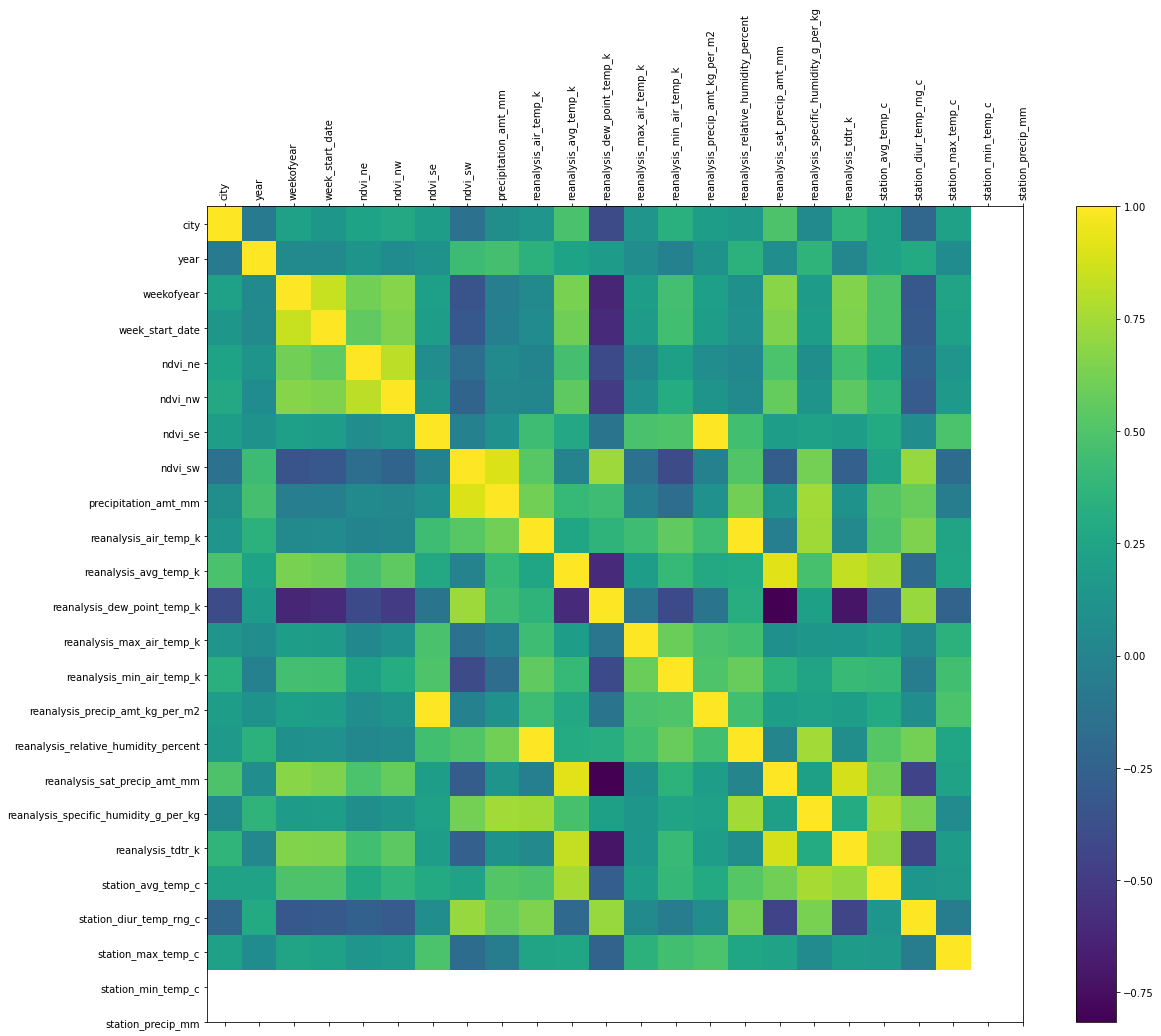

In [21]:
column_names = data.columns
fig = plt.figure(figsize=(19, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr())
fig.colorbar(cax)
xaxis = np.arange(len(column_names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(['']+column_names, rotation=90)
ax.set_yticklabels(['']+column_names)
#plt.title('Correlation Matrix', fontsize=16);
plt.show()

Plot correlation to the target value to see which variable are the most important 

Text(0.5, 1.0, 'Correlation with "total_cases" value')

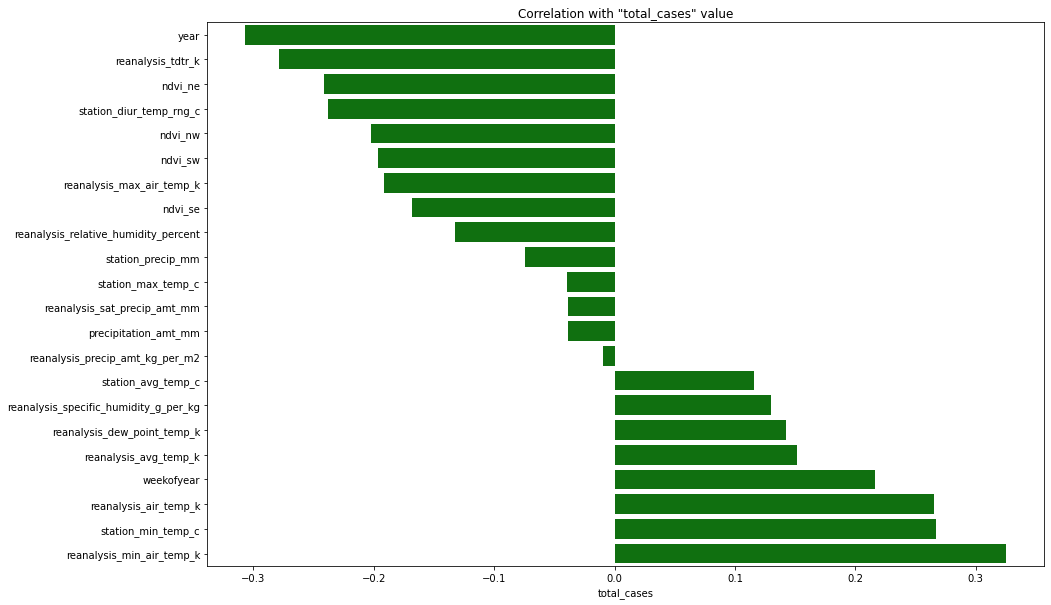

In [23]:
data_train =  pd.merge(data,labels,on=['city', 'year', 'weekofyear'],how='right')
corr = data_train.corr()  #'precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg'  
sorted_y = corr.sort_values(by='total_cases', axis=0).drop('total_cases')
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=sorted_y.total_cases, y=sorted_y.index, color="g")
ax.set_title('Correlation with "total_cases" value')

In [24]:
# will be removed from the analysis: 'precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg'
data_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'date'],
      dtype='object')

#  Data preprocessing

## Missing values
We have missing data, it can be seen from count row. It is essential to know how many records in your dataset have missing data (one or many) and decide what to do with them. We have several options: 
* Remove the row from the analysis. 
* Set an average
* Do the interpolation 

<br> The interpolation (average from the neighbours) was used instead of replacing it with just an average from the entire set as we have series data.

In [25]:
# the same steps for training and test sets
data = data.interpolate(method='linear', limit_direction='forward')
data_test_final = data_test.interpolate(method='linear', limit_direction='forward')
data.describe(include='all')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456,1456.00,1456.00,1456,1456.00,1456.00,1456.00,1456.00,1456.00,1456.00,...,1456.00,1456.00,1456.00,1456.00,1456.00,1456.00,1456.00,1456.00,1456.00,1456.00
unique,2,NaN,NaN,1049,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,sj,NaN,NaN,2005-01-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,936,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1990-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2010-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.03,26.50,NaN,0.13,0.13,0.20,0.20,45.70,298.70,...,40.13,82.17,45.70,16.74,4.90,27.18,8.10,32.45,22.10,39.36
std,NaN,5.41,15.02,NaN,0.14,0.12,0.07,0.08,43.65,1.36,...,43.31,7.15,43.65,1.54,3.54,1.28,2.13,1.96,1.57,47.29
min,NaN,1990.00,1.00,NaN,-0.41,-0.46,-0.02,-0.06,0.00,294.64,...,0.00,57.79,0.00,11.72,1.36,21.40,4.53,26.70,14.70,0.00
25%,NaN,1997.00,13.75,NaN,0.04,0.05,0.15,0.14,9.79,297.66,...,13.20,77.20,9.79,15.55,2.33,26.31,6.53,31.10,21.10,8.85


# Data Transformation
In the dataset, the station temperatures were given in Celsius scale while reanalysis temperature features were given in Kelvin scale. As a data transformation step, all of those were converted into the Kelvin.

In [31]:

data = pd.concat([data[col] - 273.15 if (col.find("_c") != -1) else data[col] for col in data], 1)                          
data.columns = data.columns.str.replace('_c','_k')

data_test_final = pd.concat([data_test_final[col] - 273.15 if (col.find("_c") != -1) else data_test_final[col] for col in data_test_final], 1)                          
data_test_final.columns = data_test_final.columns.str.replace('_c','_k')

#add column month of year
data['monthofyear'] = pd.DatetimeIndex(data['week_start_date']).month
data_test_final['monthofyear'] = pd.DatetimeIndex(data_test_final['week_start_date']).month      #data_test_final['monthofyear'] = pd.DatetimeIndex(data_test_final['week_start_date']).month

Create data frame with target values

In [32]:
data_train =  pd.merge(data,labels,on=['city', 'year', 'weekofyear'],how='right')
data_train.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_k,station_diur_temp_rng_k,station_max_temp_k,station_min_temp_k,station_precip_mm,monthofyear,total_cases,date
0,sj,1990,18,1990-04-30,0.12,0.10,0.20,0.18,12.42,297.57,...,14.01,2.63,-247.71,-266.25,-243.75,-253.15,16.0,4,4,1990-05-07
1,sj,1990,19,1990-05-07,0.17,0.14,0.16,0.16,22.82,298.21,...,15.37,2.37,-246.44,-266.78,-241.45,-250.95,8.6,5,5,1990-05-14


In [33]:
# transforming categorical data dataframe
train_dummies = pd.get_dummies(data_train.drop(['week_start_date'], axis = 1))
train_dummies=train_dummies.drop(columns=['date'])



data_test_final_dummies=pd.get_dummies(data_test_final.drop(['week_start_date'], axis = 1))

## Identify and remove outliers

Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.

Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

In [34]:
from sklearn.ensemble import IsolationForest
# summarize the shape of the training dataset
print(data.shape, labels.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.005)
IF = iso.fit_predict(train_dummies)
# select all rows that are not outliers
mask = IF != -1

(1456, 25) (1456, 5)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [35]:
data_train, labels = data_train[mask],labels[mask]
train_dummies=train_dummies[mask]
# summarize the shape of the updated training dataset
print(data_train.shape, labels.shape)

(1448, 27) (1448, 5)


In [36]:
#!pip install fbprophet

# Prediction based on time

In [37]:
from fbprophet import Prophet

In [38]:
prophet_data = data_train[['city', 'week_start_date', 'total_cases']]
prophet_data_sj = prophet_data[prophet_data['city'] == 'sj'].drop('city', axis=1)
prophet_data_iq = prophet_data[prophet_data['city'] == 'iq'].drop('city', axis=1)
test_sj = data_test[data_test['city'] == 'sj']['week_start_date']
test_iq = data_test[data_test['city'] == 'iq']['week_start_date']
prophet_data_sj.columns, prophet_data_iq.columns = ['ds', 'y'], ['ds', 'y']

In [39]:
# function to create and plot forecast 
def create_forecast(train_data, test_data, flex, seas):
    prophet = Prophet(changepoint_prior_scale=flex,yearly_seasonality=seas) 
    prophet.fit(train_data)
    future_frame = prophet.make_future_dataframe(periods=len(test_data), freq='W')  
    forecast = prophet.predict(future_frame)    
    prophet.plot(forecast)    
    forecast = forecast[['ds', 'yhat']].yhat.apply(lambda x : int(x))
    return forecast[len(train_data):]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


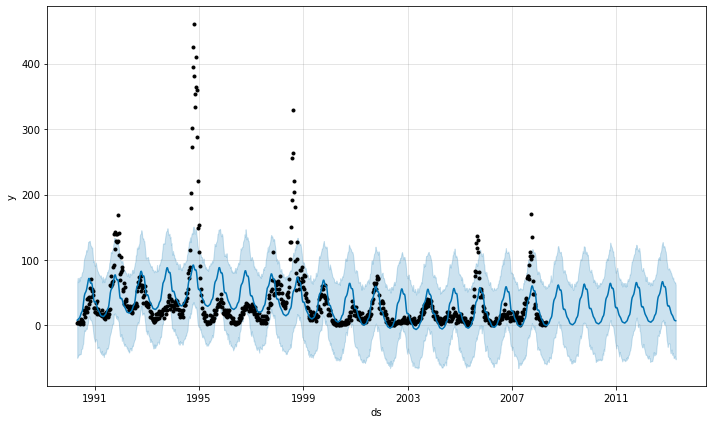

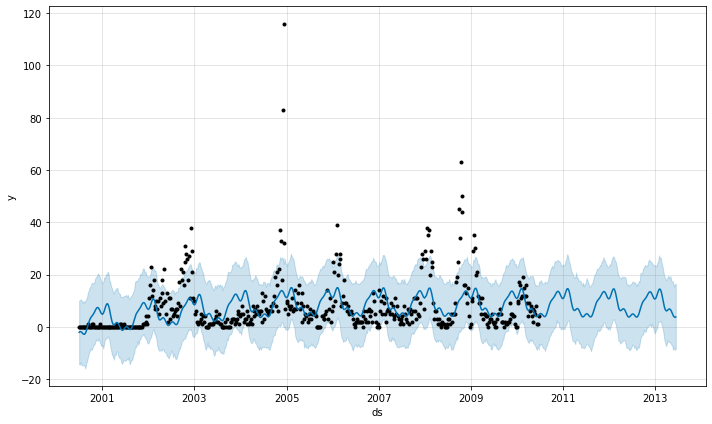

In [40]:
forecast_sj = create_forecast(prophet_data_sj, test_sj, 0.05, 10)
forecast_iq = create_forecast(prophet_data_iq, test_iq, 0.05, 5)

Create a file for Submission

In [41]:
test_index = data_test[['city', 'year', 'weekofyear']]
output = pd.concat([forecast_sj, forecast_iq]).reset_index().drop(['index'], axis=1)
output.columns = ['total_cases']
ProphetPredict=pd.concat([test_index, output], axis=1).set_index(['city'])
ProphetPredict.to_csv('ProphetPredict.csv')

# Prediction with LinearRegression  


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [43]:
indep_var=['weekofyear', 'reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_tdtr_k',
       'station_avg_temp_k', 'station_diur_temp_rng_k', 'station_max_temp_k',
       'station_min_temp_k', 'station_precip_mm']
x_input = data_train[indep_var]
y_input = labels["total_cases"]    #'precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg'


In [44]:
x = np.asanyarray(x_input)
y = np.asanyarray(y_input)

Scale=StandardScaler()
Scale.fit(x)
x_scale=Scale.transform(x)
pr=PolynomialFeatures(degree =2,include_bias=False)
x_poly=pr.fit_transform(x_scale)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2)

regr = LinearRegression()
regr.fit(x_train, y_train)

y_hat= regr.predict(x_test)
ann_err_regr = mean_absolute_error(y_test, y_hat)
print('Mean absolute error : %.2f' % ann_err_regr)

Mean absolute error : 22.88


Create a file for Submission

In [46]:
x_input_final = data_test_final[indep_var]
x_final = np.asanyarray(x_input_final)
x_scale_final=Scale.transform(x_final)
x_poly_final=pr.fit_transform(x_scale_final)


test_index = data_test[['city', 'year', 'weekofyear']]
output = pd.DataFrame(regr.predict(x_poly_final))
output.columns = ['total_cases']
LR=pd.concat([test_index, output], axis=1).set_index(['city'])
LR['total_cases']=LR['total_cases'].astype(int) 
LR.to_csv('LinearRegression.csv')

# Prediction with Neural Network

In [47]:
#!pip install tensorflow==1.4

In [48]:
import keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import datetime

Using TensorFlow backend.


In [49]:
# create y data frame with results column
y = train_dummies.loc[:,['total_cases']]
# remove y values from X
X = train_dummies.drop(columns=['total_cases', 'precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg'])
X.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_avg_temp_k,station_diur_temp_rng_k,station_max_temp_k,station_min_temp_k,station_precip_mm,monthofyear,city_iq,city_sj
0,1990,18,0.12,0.10,0.20,0.18,297.57,297.74,292.41,299.8,...,12.42,2.63,-247.71,-266.25,-243.75,-253.15,16.0,4,0,1
1,1990,19,0.17,0.14,0.16,0.16,298.21,298.44,293.95,300.9,...,22.82,2.37,-246.44,-266.78,-241.45,-250.95,8.6,5,0,1
2,1990,20,0.03,0.17,0.16,0.17,298.78,298.88,295.43,300.5,...,34.54,2.30,-246.44,-266.66,-240.95,-250.35,41.4,5,0,1
3,1990,21,0.13,0.25,0.23,0.24,298.99,299.23,295.31,301.4,...,15.36,2.43,-245.68,-266.38,-239.85,-249.85,4.0,5,0,1
4,1990,22,0.20,0.26,0.25,0.25,299.52,299.66,295.82,301.9,...,7.52,3.01,-244.21,-263.78,-238.15,-249.25,5.8,5,0,1


In [50]:
# Scale data
y = np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
print(scaler_x.fit(X))
X_scale = scaler_x.transform(X)

# Split the data to train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2)

MinMaxScaler(copy=True, feature_range=(0, 1))


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.



In [51]:
model = Sequential(layers=None, name=None)
model.add(Dense(12, input_dim=(x_train.shape[1]), kernel_initializer='normal', activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                260       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='mae', optimizer='adam')
print(x_train.shape)
print(y_train.shape)

(1158, 23)
(1158, 1)


In [53]:
history = model.fit(x_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)

Train on 926 samples, validate on 232 samples
Epoch 1/100
926/926 [==============================] - 3s 3ms/step - loss: 25.9152 - val_loss: 21.7376
Epoch 2/100
926/926 [==============================] - 1s 1ms/step - loss: 25.4669 - val_loss: 20.9753
Epoch 3/100
926/926 [==============================] - 1s 817us/step - loss: 24.2678 - val_loss: 19.2473
Epoch 4/100
926/926 [==============================] - 1s 968us/step - loss: 22.3013 - val_loss: 17.3532
Epoch 5/100
926/926 [==============================] - 1s 755us/step - loss: 21.0808 - val_loss: 16.8538
Epoch 6/100
926/926 [==============================] - 1s 990us/step - loss: 20.7107 - val_loss: 16.5655
Epoch 7/100
926/926 [==============================] - 1s 732us/step - loss: 20.3573 - val_loss: 16.2270
Epoch 8/100
926/926 [==============================] - 1s 798us/step - loss: 19.9654 - val_loss: 15.8206
Epoch 9/100
926/926 [==============================] - 1s 839us/step - loss: 19.5277 - val_loss: 15.4238
Epoch 10/100


dict_keys(['val_loss', 'loss'])


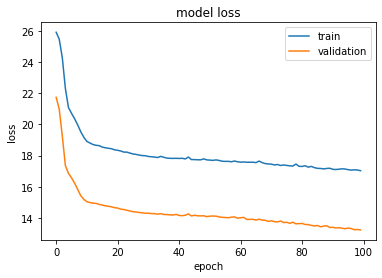

In [54]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [55]:
yhat = round(pd.DataFrame(model.predict(x_test)), 0)
ann_err = mean_absolute_error(yhat, y_test)
print('Mean absolute error : %.2f' % ann_err)

Mean absolute error : 14.03


Create a file for Submission

In [56]:

#data_test_final['monthofyear'] = pd.DatetimeIndex(data_test_final['week_start_date']).month
#data_test_final  = data_test_final.drop(['week_start_date'], axis = 1)  #'precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg'


# transforming categorical data dataframe
#test_dummies = pd.get_dummies(data_test_final)
data_test_final_dummies = data_test_final_dummies.drop(columns=['precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg'])  
X_scale_test_final = scaler_x.transform(data_test_final_dummies)


test_index = data_test[['city', 'year', 'weekofyear']]
output = round(pd.DataFrame(model.predict(X_scale_test_final)), 0)
output.columns = ['total_cases']
NN=pd.concat([test_index, output], axis=1).set_index(['city'])
NN['total_cases']=NN['total_cases'].astype(int) 
NN.to_csv('NeuralNetwork.csv')

In [57]:
output.columns = ['total_cases']
NN=pd.concat([test_index, output], axis=1).set_index(['city'])
NN['total_cases']=NN['total_cases'].astype(int) 
NN.to_csv('NeuralNetwork.csv')
NN.head()

,year,weekofyear,total_cases
city,,,
sj,2008,18,3
sj,2008,19,3
sj,2008,20,3
sj,2008,21,4
sj,2008,22,4
